# Lab 8


## Setup for SUSY Dataset

Use the SUSY dataset for the rest of this lab. Here is a basic setup.

In [1]:
# Our usual libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML, display
import tabulate

In [2]:
filename="../Lab.7/SUSY.csv"
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", 
          "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET",
          "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]
df = pd.read_csv(filename, dtype='float64', names=VarNames)

## Scikit-Learn

[Scikit-learn](http://scikit-learn.org) is a rich python library for data science, including machine learning. For example, we can build a Fisher Discriminant (aka Linear Discriminant Analysis, or LDA). 

### Exercise 1: Install Scikit-Learn

Follow the [Installation Instructions](https://scikit-learn.org/stable/install.html) and install `scikit-learn` in your environment.

In [3]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


### Exercise 2: Read About Classifiers

#### Part a
Scikit-learn offers an impressively comprehensive list of machine learning algorithms. Browse through [scikit-learn's documentation](https://scikit-learn.org/stable/index.html). You'll note the algorithms are organized into classification, regression, clustering, dimensionality reduction, model selection, and preprocessing. Browse through the list of [classification algorithms](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning). 

#### Part b
Note scikit-learn's documentation is rather comprehensive. The documentation on [linear models](https://scikit-learn.org/stable/modules/linear_model.html) shows how classification problems are setup. Read about the first few methods and try to comprehend the example codes. Skim the rest of the document.

#### Part c
Read through the [LDA Documentation](https://scikit-learn.org/stable/modules/lda_qda.html).


### Exercise 3: Training a Classifier

Lets' repeat what we did manually in the previous lab using scikit-learn. We'll use a LDA classifier, which we can instanciate as follows:

In [4]:
import sklearn.discriminant_analysis as DA
Fisher=DA.LinearDiscriminantAnalysis()

As discussed in the lecture, to properly formulate our problem, we'll have to:

* Define the inputs (X) vs outputs (Y)
* Designate training vs testing samples (in order to get a unbias assessment of the performance of Machine Learning algorithms)

for example, here we'll take use 4M events for training and the remainder for testing.

In [5]:
N_Train=4000000

Train_Sample=df[:N_Train]
Test_Sample=df[N_Train:]

X_Train=Train_Sample[VarNames[1:]]
y_Train=Train_Sample["signal"]

X_Test=Test_Sample[VarNames[1:]]
y_Test=Test_Sample["signal"]

Test_sig=Test_Sample[Test_Sample.signal==1]
Test_bkg=Test_Sample[Test_Sample.signal==0]


We can train the classifier as follow:

In [6]:
Fisher.fit(X_Train,y_Train)

LinearDiscriminantAnalysis()

We can plot the output, comparing signal and background:

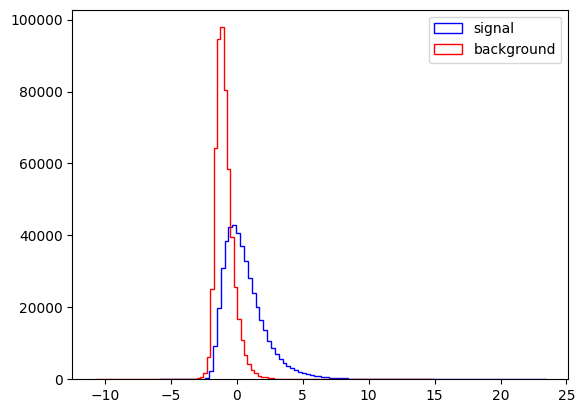

In [7]:
plt.figure()
plt.hist(Fisher.decision_function(Test_sig[VarNames[1:]]),bins=100,histtype="step", color="blue", label="signal",stacked=True)
plt.hist(Fisher.decision_function(Test_bkg[VarNames[1:]]),bins=100,histtype="step", color="red", label="background",stacked=True)
plt.legend(loc='upper right')
plt.show()

#### Part a

Compare ROC curves computed on the test versus training samples, in a single plot. Do you see a bias?

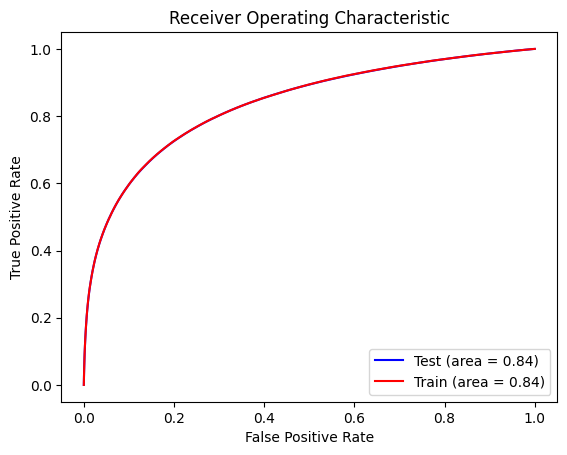

In [8]:
# Compare ROC curves computed on the test versus training samples, in a single plot.
from sklearn.metrics import roc_curve, auc

y_score_train = Fisher.decision_function(X_Train)
y_score_test = Fisher.decision_function(X_Test)

fpr_train, tpr_train, _ = roc_curve(y_Train, y_score_train)
fpr_test, tpr_test, _ = roc_curve(y_Test, y_score_test)

auc_train = auc(fpr_train, tpr_train)
auc_test = auc(fpr_test, tpr_test)

plt.plot(fpr_train, tpr_train, label='Test (area = {:.2f})'.format(auc_train), color='blue')
plt.plot(fpr_test, tpr_test, label='Train (area = {:.2f})'.format(auc_test), color='red')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


#### Part b

Train the Fisher performance of using the raw, features, and raw+features as input. Compare the performance one a single plot. 

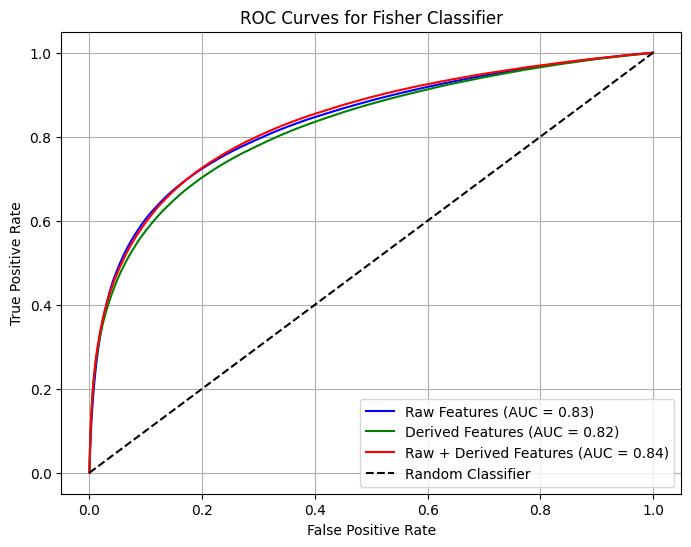

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import sklearn.discriminant_analysis as DA

# Define raw and derived features
RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

# Prepare datasets for raw, features, and raw+features
X_raw = Train_Sample[RawNames]
X_features = Train_Sample[FeatureNames]
X_combined = Train_Sample[RawNames + FeatureNames]

y_train = Train_Sample["signal"]
X_raw_test = Test_Sample[RawNames]
X_features_test = Test_Sample[FeatureNames]
X_combined_test = Test_Sample[RawNames + FeatureNames]
y_test = Test_Sample["signal"]

# Train Fisher classifiers
Fisher_raw = DA.LinearDiscriminantAnalysis()
Fisher_features = DA.LinearDiscriminantAnalysis()
Fisher_combined = DA.LinearDiscriminantAnalysis()

Fisher_raw.fit(X_raw, y_train)
Fisher_features.fit(X_features, y_train)
Fisher_combined.fit(X_combined, y_train)

# Get decision function scores
y_score_raw = Fisher_raw.decision_function(X_raw_test)
y_score_features = Fisher_features.decision_function(X_features_test)
y_score_combined = Fisher_combined.decision_function(X_combined_test)

# Compute ROC curves and AUCs
fpr_raw, tpr_raw, _ = roc_curve(y_test, y_score_raw)
auc_raw = auc(fpr_raw, tpr_raw)

fpr_features, tpr_features, _ = roc_curve(y_test, y_score_features)
auc_features = auc(fpr_features, tpr_features)

fpr_combined, tpr_combined, _ = roc_curve(y_test, y_score_combined)
auc_combined = auc(fpr_combined, tpr_combined)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_raw, tpr_raw, label="Raw Features (AUC = {:.2f})".format(auc_raw), color="blue")
plt.plot(fpr_features, tpr_features, label="Derived Features (AUC = {:.2f})".format(auc_features), color="green")
plt.plot(fpr_combined, tpr_combined, label="Raw + Derived Features (AUC = {:.2f})".format(auc_combined), color="red")
plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Fisher Classifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### Exercise 4: Comparing Techniques

#### Part a
Select 3 different classifiers from the techniques listed [here](http://scikit-learn.org/stable/supervised_learning.html#supervised-learning) to compare. Note that you can use the multi-layer perceptron to build a deep network, though training may be prohibitively slow. So avoid this technique.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


#### Part b

Write a function that takes an instantiated classifier and performs the comparison from part 3b. Use the function on your choice of functions in part a.


Comparing Logistic Regression...


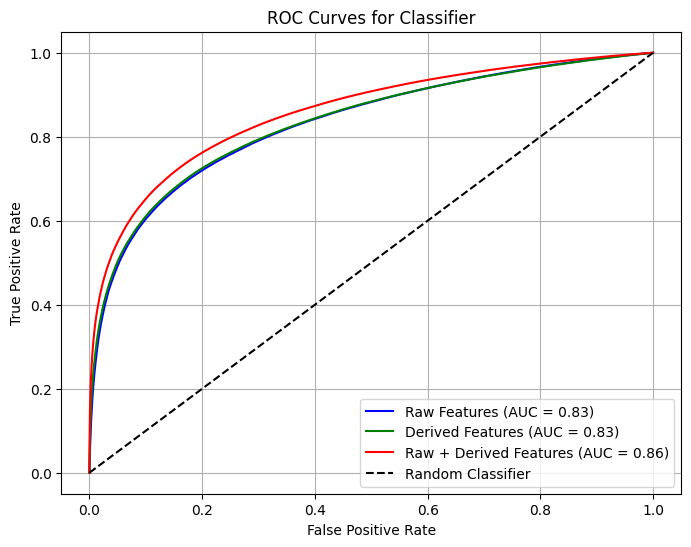

Comparing Naive Bayes...


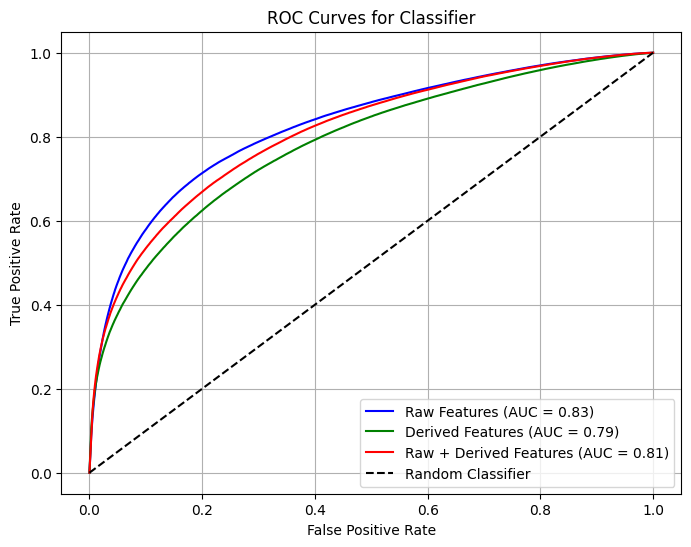

Comparing Decision Tree...


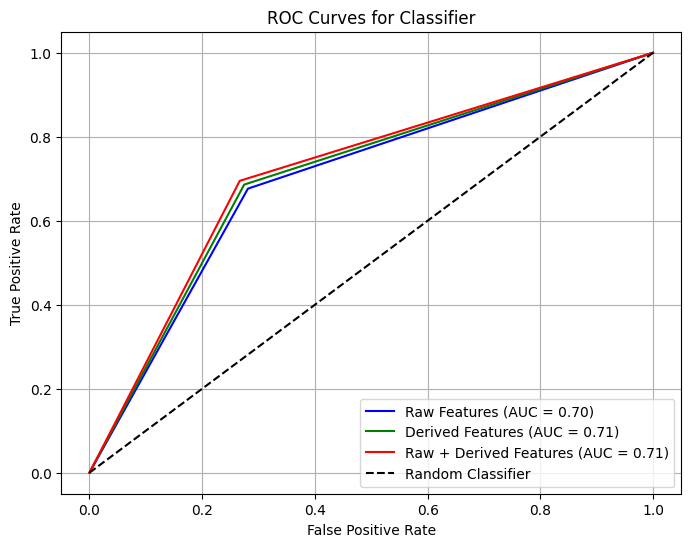

In [16]:
def compare(model):
    """
    Trains a classifier on raw, derived, and combined features, 
    computes ROC curves, and plots them.
    """
    # Define raw and derived features
    RawNames = ["l_1_pT", "l_1_eta", "l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
    FeatureNames = ["MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

    # Prepare datasets for raw, features, and raw+features
    X_raw = Train_Sample[RawNames]
    X_features = Train_Sample[FeatureNames]
    X_combined = Train_Sample[RawNames + FeatureNames]

    y_train = Train_Sample["signal"]
    X_raw_test = Test_Sample[RawNames]
    X_features_test = Test_Sample[FeatureNames]
    X_combined_test = Test_Sample[RawNames + FeatureNames]
    y_test = Test_Sample["signal"]

    # Train and evaluate on raw features
    model.fit(X_raw, y_train)
    if hasattr(model, "predict_proba"):
        y_score_raw = model.predict_proba(X_raw_test)[:, 1]
    else:
        y_score_raw = model.decision_function(X_raw_test)
    fpr_raw, tpr_raw, _ = roc_curve(y_test, y_score_raw)
    auc_raw = auc(fpr_raw, tpr_raw)

    # Train and evaluate on derived features
    model.fit(X_features, y_train)
    if hasattr(model, "predict_proba"):
        y_score_features = model.predict_proba(X_features_test)[:, 1]
    else:
        y_score_features = model.decision_function(X_features_test)
    fpr_features, tpr_features, _ = roc_curve(y_test, y_score_features)
    auc_features = auc(fpr_features, tpr_features)

    # Train and evaluate on combined features
    model.fit(X_combined, y_train)
    if hasattr(model, "predict_proba"):
        y_score_combined = model.predict_proba(X_combined_test)[:, 1]
    else:
        y_score_combined = model.decision_function(X_combined_test)
    fpr_combined, tpr_combined, _ = roc_curve(y_test, y_score_combined)
    auc_combined = auc(fpr_combined, tpr_combined)

    # Plot ROC curves
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_raw, tpr_raw, label=f"Raw Features (AUC = {auc_raw:.2f})", color="blue")
    plt.plot(fpr_features, tpr_features, label=f"Derived Features (AUC = {auc_features:.2f})", color="green")
    plt.plot(fpr_combined, tpr_combined, label=f"Raw + Derived Features (AUC = {auc_combined:.2f})", color="red")
    plt.plot([0, 1], [0, 1], "k--", label="Random Classifier")

    # Plot formatting
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Classifier")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Compare classifiers
for name, clf in classifiers.items(): 
    print(f"Comparing {name}...")
    compare(clf)


#### Part c

Use the best method from part c to compute the maximal significance $\sigma_S= \frac{N_S}{\sqrt{N_S+N_B}}$ for the scenarios in lab 5.

In [17]:
from sklearn.linear_model import LogisticRegression
import numpy as np

# Function to compute maximal significance
def compute_max_significance(N_S, N_B):
    """
    Compute the maximal significance given the number of signal (N_S) 
    and background (N_B) events.
    """
    return N_S / np.sqrt(N_S + N_B)

# Scenarios
scenarios = [
    {"N_S": 10, "N_B": 100},
    {"N_S": 100, "N_B": 1000},
    {"N_S": 1000, "N_B": 10000},
    {"N_S": 10000, "N_B": 100000},
]

# Prepare data
X_train = Train_Sample[VarNames[1:]]
y_train = Train_Sample["signal"]
X_test = Test_Sample[VarNames[1:]]
y_test = Test_Sample["signal"]

# Train the Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Compute decision scores for the test set
y_score = logistic_model.decision_function(X_test)

# Compute and display maximal significance for each scenario
for scenario in scenarios:
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]
    significance = compute_max_significance(N_S, N_B)
    print(f"For N_S={N_S}, N_B={N_B}, Maximal Significance (o_S) = {significance:.2f}")

For N_S=10, N_B=100, Maximal Significance (σ_S) = 0.95
For N_S=100, N_B=1000, Maximal Significance (σ_S) = 3.02
For N_S=1000, N_B=10000, Maximal Significance (σ_S) = 9.53
For N_S=10000, N_B=100000, Maximal Significance (σ_S) = 30.15


### Exercise 5: Metrics

Scikit-learn provides methods for computing the FPR, TPR, ROC, AUC metrics. For example:

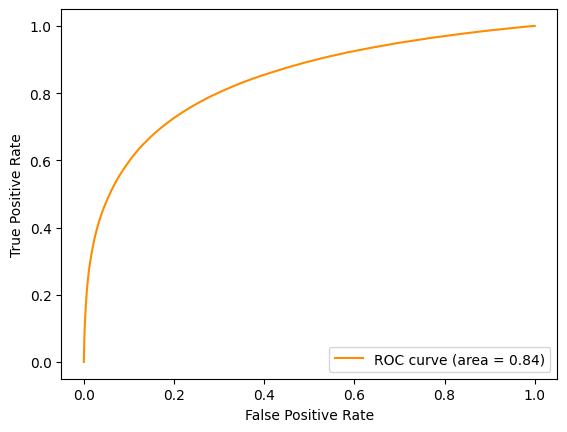

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_Test, Fisher.decision_function(X_Test))

roc_auc = auc(fpr, tpr)

plt.plot(fpr,tpr,color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()


#### Part a
TPR/FPR/ROC/AUC are one way of assessing the quality of a classifier. Read about [Precision and Recall](https://en.wikipedia.org/wiki/Precision_and_recall), [Accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision), and [F-score](https://en.wikipedia.org/wiki/F-score).

#### Part b
Look through [model evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html#) documentation. Using scikit-learns tools, compute TPR, FPR, ROC, AUC, Precision, Recall, F1 score, and accuracy for the method you selected in 4c above and each scenario. Make a nice table, which also includes the maximal significance. 


In [25]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import tabulate
import pandas as pd

# Prepare data
signal_data = Train_Sample[Train_Sample["signal"] == 1]
background_data = Train_Sample[Train_Sample["signal"] == 0]

results = []

# Loop through each scenario
for scenario in scenarios:
    N_S = scenario["N_S"]
    N_B = scenario["N_B"]
    
    # Create training data for the scenario
    train_signal = signal_data.sample(n=N_S, random_state=42)
    train_background = background_data.sample(n=N_B, random_state=42)
    train_data = pd.concat([train_signal, train_background])
    
    X_train = train_data[VarNames[1:]]
    y_train = train_data["signal"]
    
    # Create test data (use the remaining data for testing)
    test_signal = signal_data.drop(train_signal.index)
    test_background = background_data.drop(train_background.index)
    test_data = pd.concat([test_signal, test_background])
    
    X_test = test_data[VarNames[1:]]
    y_test = test_data["signal"]
    
    # Train the Logistic Regression model
    logistic_model = LogisticRegression(max_iter=1000)
    logistic_model.fit(X_train, y_train)
    
    # Predict probabilities and classes for the test set
    y_prob = logistic_model.predict_proba(X_test)[:, 1]  # Probability of being signal
    y_pred = (y_prob >= 0.5).astype(int)  # Classify using a threshold of 0.5
    
    # Compute metrics
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Compute maximal significance
    significance = compute_max_significance(N_S, N_B)
    
    # Append results for the scenario
    results.append({
        "Scenario": f"N_S={N_S}, N_B={N_B}",
        "TPR": tpr[-1],
        "FPR": fpr[-1],
        "ROC AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy,
        "Maximal Significance": significance
    })

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the table
print(tabulate.tabulate(results_df, headers='keys', tablefmt='grid'))

+----+-----------------------+-------+-------+-----------+-------------+----------+------------+------------+------------------------+
|    | Scenario              |   TPR |   FPR |   ROC AUC |   Precision |   Recall |   F1 Score |   Accuracy |   Maximal Significance |
+====+=======================+=======+=======+===========+=============+==========+============+============+========================+
|  0 | N_S=10, N_B=100       |     1 |     1 |  0.792433 |    0.961735 | 0.22484  |   0.364471 |   0.641343 |               0.953463 |
+----+-----------------------+-------+-------+-----------+-------------+----------+------------+------------+------------------------+
|  1 | N_S=100, N_B=1000     |     1 |     1 |  0.827438 |    0.974228 | 0.287998 |   0.444573 |   0.670774 |               3.01511  |
+----+-----------------------+-------+-------+-----------+-------------+----------+------------+------------+------------------------+
|  2 | N_S=1000, N_B=10000   |     1 |     1 |  0.85185